# **Google says the site is not secure!**

Welcome to my notebook on Kaggle. I did record my notes so it might help others in their journey to understand Machine Learning / Neural Networks by examples. This notebook is my way to contribute back to the Kaggle platform and community.

I noticed that a lot of terminology and algorithems are thrown around and often some good math to underpin why it is correct. I can read, study and even understand it but after lot's of other terminology and weeks passing I catch myself often going back to understand it again because it didn't "stick". Doing exercises, work with the algorithm and trying out for myself helps me to overcome this, learning by example. So for Expectation Mazimization I created this notebook and try it for myself in a simple example.



# Table of Contents
  
1. [Expectation Maximization](#sec1)
1. [How the EM algorithem works](#sec2)
1. [Basic example of Expectation Maximization](#sec3)
    1. [Gaussian Mixture Model of 2 Gaussians](#sec31)
    1. [A single Gaussion will not fit the data well](#sec32)
1. [The code for EM with 2 Gaussian mixture model](#sec4)
    1. [See the algorithm in action](#sec41)
    1. [Find best Mixture Gaussian model](#sec42)
    1. [Results](#sec43)
    1. [Further enhancements to the code](#sec44)    
1. [sklearn GaussianMixture](#sec5)
1. [If you want to explore this subject further](#sec6)   

<a id='sec1'></a>
# Expectation Maximization
In statistics, an expectation–maximization (EM) algorithm is an iterative method to find maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables. The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)


<a id='sec2'></a>
# How the EM algorithm works

Please have a look at this short video where it is explained very well on a 1-dimensional example: https://www.youtube.com/watch?v=iQoXFmbXRJA  
  
    
    

![](http://www.wilsonmongwe.co.za/wp-content/uploads/2015/07/400px-EM.jpg)

Below slides explaining with a 2-dimensional example
![alt text](http://i.imgur.com/0cTmOja.png "Logo Title Text 1")

![alt text](http://i.imgur.com/8kQ9aa6.png "Logo Title Text 1")

![alt text](http://i.imgur.com/A1j3lqB.png "Logo Title Text 1")

<a id='sec3'></a>
# Basic example of Expectation Maximization

Let's try this on a simple basic example.  
Objective: Let's etimate the probability distribution in a 1-dimensional dataset
*  that we generated ourselves using  2 gaussian normal probability distributions.
*  Using a Gaussian mixture model with 2 normal gaussian distributions

Or in other words, we should be able to find our own mean and standard deviation parameters we used to generate the testset.

Note, this notebook is for building the basic conceptual understanding of the EM algorithm. Not to have the best code, the best computable algorithm, etc. I tried to keep it simple.


<a id='sec31'></a>
## Gaussian Mixture Model of 2 Gaussians
Two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$.

There are 5 paramaters to estimate: $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$ where $w$ is the probability that the data comes from the first normal probability distribution  (and 1-$w$) it comes from the second normal probability distribution)

The probability density function (PDF) of the mixture model is:

$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  

Objective is to best fit a given probability density by finding $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$ through EM iterations

Let try it out (code credits go to [ brianspiering](https://github.com/brianspiering/gaussian_mixture_models/blob/master/intro_to_gmm_%26_em.ipynb))


In [ ]:
# @title Default title text
# import libraries

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
print("import done")

import done


![](http://)# Generate the data yourself
Select $\mu_1, \sigma_1$ and $\mu_2, \sigma_2$ to generate the data


Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0


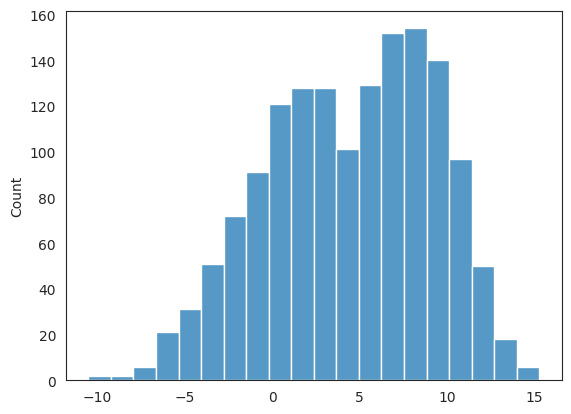

In [ ]:
random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)

# For data visiualisation calculate left and right of the graph
Min_graph = min(data)
Max_graph = max(data)
x = np.linspace(Min_graph, Max_graph, 2000) # to plot the data

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
#sns.distplot(data, bins=20, kde=False);
sns.histplot(data, bins=20);

pdf = $\frac{1}{\sqrt{2\pi \sigma^{2}}}e^{\frac{-(x-\mu)^2}{2\sigma^{2}}}$


In [ ]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)
print("done")

done


<a id='sec32'></a>
## A single Gaussion will not fit the data well
Calculating the mean and standard deviation of the dataset shows it does not fit well  
Seaborn docs:  
https://seaborn.pydata.org/generated/seaborn.histplot.html

Best single Gaussian: μ = 4.4, σ = 4.8


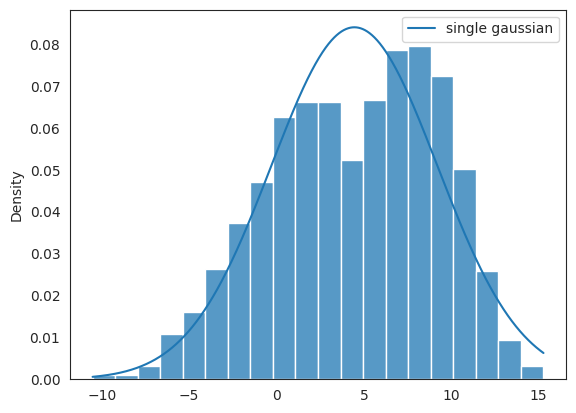

In [ ]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))
#fit a single gaussian curve to the data
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
#sns.distplot(data, bins=20, kde=False, norm_hist=True);# norm_hist=True means display density instead of count, it's optional
sns.histplot(data, bins=20, kde=False, stat="density");
plt.plot(x, g_single, label='single gaussian');
plt.legend();

<a id='sec4'></a>
# The code for EM with 2 Gaussian mixture model

In [ ]:
z = 20
if z%5==0:
  print(f"z:{z}")

z:20


In [ ]:
def f(args): return args
list_name = [1,2,3,4]
f(list_name)

[1, 2, 3, 4]

In [ ]:
def f(*args): return args
list_name = [1,2,3,4]
f(*list_name) # nicer than f(list_name[0],list_name[1],list_name[2],list_name[3])
print("type(*list_name)->'TypeError: type() takes 1 or 3 arguments'\n",
      *list_name, ", type(f(*list_name))", type(f(*list_name)), ", f(*list_name)",f(*list_name))

type(*list_name)->'TypeError: type() takes 1 or 3 arguments'
 1 2 3 4 , type(f(*list_name)) <class 'tuple'> , f(*list_name) (1, 2, 3, 4)


$\mu_{b}=\frac{b_{1}x_{1}+b_{2}x_{2}+\ldots+b_{n}x_{n}}{b_{1}+b_{2}+\ldots+b_{n}}$  
$\sigma_{b}^{2}=\frac{b_{1}(x_{1}-\mu_{b})+b_{2}(x_{2}-\mu_{b})+\ldots+b_{n}(x_{n}-\mu_{b})}{b_{1}+b_{2}+\ldots+b_{n}}$  
Consider what happens if, say, $b_{1}=0$  
$a_{1_{2_{3_{4}}}}$

In [ ]:
class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        #todo the Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end

        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max),
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max),
                            uniform(sigma_min, sigma_max))

        #as well as how much to mix them
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den     # wp1+wp2= 1, it either belongs to gaussian 1 or gaussion 2
            # add into loglike
            self.loglike += log(den) #update self.loglike in the process
            # yield weight tuple
            yield (wp1, wp2)

    #def Mstep(self, weights,i):
    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators, left is list of wp1, rigt is list of wp2, from the E-step
        (left, rigt) = zip(*weights)
        one_den = sum(left) # denominators should be counts, not sum
        two_den = sum(rigt)

        #one_den = len(left)
        #two_den = len(rigt)
        #print(f"left:{type(left)}, rigt:{len(rigt)}, one_den:{one_den}, len data:{len(data)}")
        #if i%5==0:
        if True:
          try:
            x1 = sum(w * d  for (w, d) in zip(left, data)) / len(left)
            s1 = sqrt(sum(w * ((d - x1) ** 2)
                                    for (w, d) in zip(left, data)) / len(left))
            print(f"x1:{x1}, s1:{s1}")
          except ZeroDivisionError:
            print(f"len(left):{len(left)}")
          try:
            x2 = sum(w * d  for (w, d) in zip(rigt, data)) / len(rigt)
            s2 = sqrt(sum(w * ((d - x2) ** 2)
                                    for (w, d) in zip(rigt, data)) / len(rigt))
            print(f"x2:{x2}, s2:{s2}")
          except ZeroDivisionError:
            print(f"len(left):{len(rigt)}")

        # compute new means (are new means being normalizied by / one_den, / two_den?)
        self.one.mu = sum(w * d  for (w, d) in zip(left, data)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data)) / two_den

        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data) # this causes division by zero if 'one_den' is len(data)
        # should be self.mix = one_den / (one_den + two_den)
        #print(f"mu1:{self.one.mu}, mu2:{self.two.mu}, s1:{self.one.sigma}, s2:{self.two.sigma}, mix:{self.mix}")


    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            #self.Mstep(self.Estep(),i) #The heart of the algorith, perform E-step and next M-step
            #if verbose and i%5==0:
            self.Mstep(self.Estep()) #The heart of the algorith, perform E-step and next M-step
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to update self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)

    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one,
                                                              self.two,
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one,
                                                        self.two,
                                                        self.mix)
print("done")

done


<a id='sec41'></a>
## See the algorithm in action

In [ ]:
"""
# See the algorithm in action
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture_self(data)

try:
    #train!
    mix.iterate(N=20,verbose=True)
    if mix.loglike > best_loglike:
        best_loglike = mix.loglike
        best_mix = mix
except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
    print("one less")
    pass
"""

'\n# See the algorithm in action\nn_iterations = 20\nbest_mix = None\nbest_loglike = float(\'-inf\')\nmix = GaussianMixture_self(data)\n\ntry:\n    #train!\n    mix.iterate(N=20,verbose=True)\n    if mix.loglike > best_loglike:\n        best_loglike = mix.loglike\n        best_mix = mix\nexcept (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...\n    print("one less")\n    pass\n'

In [ ]:
# See the algorithm in action
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture_self(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix

    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        print("one less")
        pass


x1:4.549210252719696, s1:4.545909096619054
x2:-0.09941496570419442, s2:0.8305826064080724
 1 Mixture: Gaussian(4.6161, 4.57872), Gaussian(-6.86102, 1.37521), mix=0.986)
x1:4.515685833632219, s1:4.6189747285817795
x2:-0.06589054661671312, s2:0.6453116508266599
 1 Mixture: Gaussian(4.56461, 4.64367), Gaussian(-6.14763, 1.36578), mix=0.989)
x1:4.506955133345284, s1:4.6382618430894045
x2:-0.057159846329779836, s2:0.5769784818613657
 1 Mixture: Gaussian(4.55278, 4.66156), Gaussian(-5.67919, 1.21199), mix=0.99)
x1:4.506744849220121, s1:4.639489647274504
x2:-0.056949562204615424, s2:0.5610041247520947
 1 Mixture: Gaussian(4.55455, 4.66379), Gaussian(-5.42602, 1.07676), mix=0.99)
x1:4.509795237509946, s1:4.633838008997149
x2:-0.059999950494443406, s2:0.5671305393460876
 1 Mixture: Gaussian(4.56148, 4.66003), Gaussian(-5.29499, 0.989594), mix=0.989)
x1:4.513752329438146, s1:4.6262071328709
x2:-0.06395704242264125, s2:0.580129699552811
 1 Mixture: Gaussian(4.56972, 4.65446), Gaussian(-5.22201, 0

<a id='sec42'></a>
## Find best Mixture Gaussian model

Computing best model with random restarts...

x1:-0.024551852908308518, s1:0.4682975580491469
x2:4.474347139923814, s2:4.698119509351623
x1:-0.013767437766856554, s1:0.33790405193972184
x2:4.463562724782363, s2:4.721958960105617
x1:-0.009640656181801327, s1:0.27183074731447127
x2:4.459435943197306, s2:4.730991124551732
x1:-0.007757894393616328, s1:0.23339411878540625
x2:4.457553181409123, s2:4.735142028219948
x1:-0.006992928733695617, s1:0.2117723448035183
x2:4.456788215749203, s2:4.736910842409059
x1:-0.006997157071438586, s1:0.20318654496442404
x2:4.456792444086941, s2:4.73708996085414
x1:-0.007718341477927965, s1:0.2068940734693535
x2:4.457513628493435, s2:4.73582599205949
x1:-0.009153108331343595, s1:0.2212536418693162
x2:4.458948395346847, s2:4.733150857686718
x1:-0.011280687436490546, s1:0.2433042608256203
x2:4.461075974451994, s2:4.7291253769550305
x1:-0.014133210037564967, s1:0.2710577418538469
x2:4.463928497053071, s2:4.723696214297771
x1:-0.017779482505509463, s1:0.3033911454

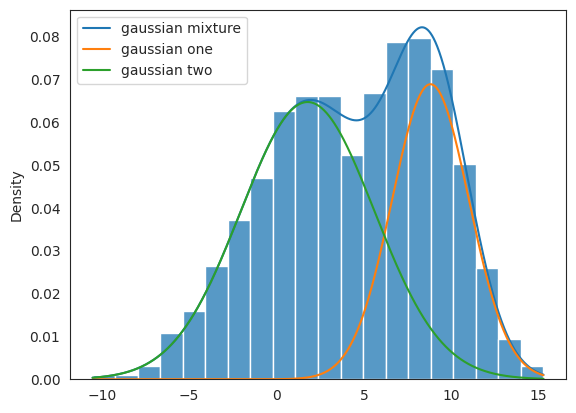

In [ ]:
# Find best Mixture Gaussian model
n_iterations = 300
n_random_restarts = 4
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture_self(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
#print('Best Gaussian Mixture : μ = {:.2}, σ = {:.2} with μ = {:.2}, σ = {:.2}'.format(best_mix.one.mu, best_mix.one.sigma, best_mix.two.mu, best_mix.two.sigma))

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("1", best_mix.one.mu, best_mix.one.sigma, best_mix.mix))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("2", best_mix.two.mu, best_mix.two.sigma, (1-best_mix.mix)))
#Show mixture
#sns.distplot(data, bins=20, kde=False, norm_hist=True);
sns.histplot(data, bins=20, kde=False, stat="density");
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
g_left = [best_mix.one.pdf(e) * best_mix.mix for e in x]
plt.plot(x, g_left, label='gaussian one');
g_right = [best_mix.two.pdf(e) * (1-best_mix.mix) for e in x]
plt.plot(x, g_right, label='gaussian two');
plt.legend();


<a id='sec43'></a>
## Results
The models nicely estimates our own mean entered μ and σ. With this understanding it is not hard to imagine to extend this to n-Gaussians or m-dimensions. You don't need to write complax code since these algorithms have been implemented in some excellent libraries.
<a id='sec44'></a>
## Further enhancements to the code
The Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end. For me (and guess others) I needed to get to base-camp first and get the EM steps understood.
<a id='sec5'></a>
# sklearn GaussianMixture
Or we could make use of a library that already has the functionality implemented. The sklearn GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models.  A GaussianMixture.fit method is provided that learns a Gaussian Mixture Model from train data. Now you can try yourself with n-Gaussians or m-dimensions.

Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0
Gaussian 1: μ = 8.8, σ = 2.2, weight = 0.39
Gaussian 2: μ = 1.7, σ = 3.8, weight = 0.61


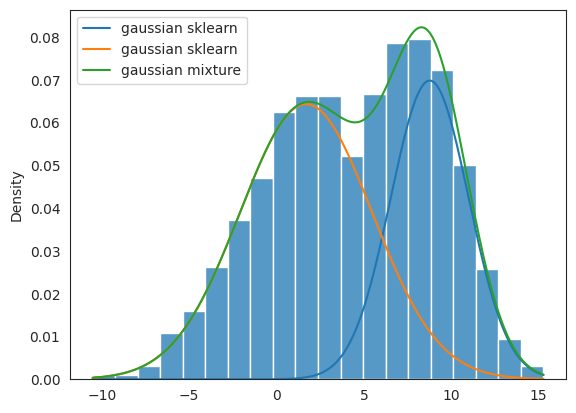

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2, tol=0.000001)
gmm.fit(np.expand_dims(data, 1)) # Parameters: array-like, shape (n_samples, n_features), 1 dimension dataset so 1 feature
Gaussian_nr = 1
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label='gaussian sklearn');
    Gaussian_nr += 1
#
sns.histplot(data, bins=20, kde=False, stat="density"); # type for stat must be:  one of 'count', 'density', 'percent', 'probability' or 'frequency'
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x]) #gmm gives log probability, hence the exp() function
plt.plot(x, gmm_sum, label='gaussian mixture');
plt.legend();

<a id='sec6'></a>
# If you want to explore this subject further

If you want to have a more formal understand of Gaussian mixture, I would recommend:  
https://www.youtube.com/watch?v=4vGiHC35j9s   
if you want to have a less formal, please watch:  
https://www.youtube.com/watch?v=JNlEIEwe-Cg  
EM Demystified: An Expectation-Maximization Tutorial:  
https://vannevar.ece.uw.edu/techsite/papers/documents/UWEETR-2010-0002.pdf  



Hope you liked my notebook (upvote top right), my way to conribute back to this fantastic Kaggle platform and community.

The reason why I needed to understand expectation Maximization is because it was mentioned in research work on biological inspired true artificial intelligence where neuroscience produced a candidate which suggests that several global brain theories might be unified within a free-energy framework: Free Energy Principle (FEP) by Karl Friston: The free-energy principle is an attempt to explain the structure and function of the brain, starting from the very fact that we exist.
Curious? See my notebook:  
https://www.kaggle.com/charel/learn-by-example-active-inference-in-the-brain-1
